<a href="https://colab.research.google.com/github/ninadcpa/DSC630/blob/main/Week3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 Assignment

@author - Ninad Patkhedkar

In [1]:
# This code is written for mounting code folder checked out from github on google drive
# All assignment code will be maintained inside folder "DSC630"

from google.colab import drive
import sys
import os

drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DSC630')
os.chdir('/content/drive/MyDrive/Colab Notebooks/DSC630')

Mounted at /content/drive


For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:  
* Box plots  
* Scatter plots  
* Regression Model  


In [2]:
# Reading csv file and loading data into dataframe
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

pd.set_option("display.precision", 2)
# Substitute values used for missing values in dataset
missing_values = ["n/a", "na", "--",""]
# Load the data in pandas dataframe with missing values set to NaN
df = pd.read_csv('dodgers.csv',na_values = missing_values)

Lets check the dimension of the data.

In [3]:
df.shape

(81, 12)

Data contains 81 observarions and 12 features.

Lets check the sample of data to get the feel of data.

In [4]:
df.sample(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
61,AUG,24,39805,Friday,Marlins,71,Clear,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
44,JUL,14,54014,Saturday,Padres,75,Clear,Night,NO,NO,NO,YES
67,SEP,2,31607,Sunday,Snakes,89,Clear,Day,NO,NO,NO,NO
53,AUG,4,46588,Saturday,Cubs,73,Cloudy,Night,NO,NO,NO,NO
30,JUN,11,50559,Monday,Angels,68,Clear,Night,NO,YES,NO,NO
39,JUL,1,55359,Sunday,Mets,75,Clear,Night,NO,NO,NO,YES
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
42,JUL,4,53570,Wednesday,Reds,70,Clear,Night,NO,NO,YES,NO


Lets check what are various features in dataset and data type.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


Information about features

> **month** - Month the game was held  
> **day** - Date the game was held  
> **attend** - Number of attendees at the game  
> **day_of_week** - Day the game was held  
> **opponent** - Name of the opposing team  
> **temp** - Temperature during the game  
> **skies** - Weather conditions of the game  
> **day_night** - Whether the game was played in the day or night  
> **cap** - Yes, if cap was given as a promotion else No  
> **shirt** - Yes, if shirt was given as a promotion else No  
> **firweworks** - Yes, if fireworks was given as a promotion else No  
> **bobblehead** - Yes, if bobblehead was given as a promotion else No

Lets describe the statistics of nominal fields

In [6]:
df.describe()

,day,attend,temp
count,81.00,81.00,81.00
mean,16.14,41040.07,73.15
std,9.61,8297.54,8.32
min,1.00,24312.00,54.00
25%,8.00,34493.00,67.00
50%,15.00,40284.00,73.00
75%,25.00,46588.00,79.00
max,31.00,56000.00,95.00


I notice, since day of the month integer value, it is considered as nominal value. However in reality it is ordinal value.

Simple way to fix this could be to covert day of month field from integer to string.

In [7]:
df['day'] = df['day'].astype(str)
df.describe()

,attend,temp
count,81.00,81.00
mean,41040.07,73.15
std,8297.54,8.32
min,24312.00,54.00
25%,34493.00,67.00
50%,40284.00,73.00
75%,46588.00,79.00
max,56000.00,95.00


Lets check the basic statistics of 
* ordinal fields
* categorical fields

In [8]:
df.describe(include=['O'])

,month,day,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81,81
unique,7,31,7,17,2,2,2,2,2,2
top,MAY,13,Sunday,Snakes,Clear,Night,NO,NO,NO,NO
freq,18,5,13,9,62,66,79,78,67,70


But are there any missing values?

In [9]:
df.isna().sum(axis=0)

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

Dataset is really clean. There are no missing values.
Now lets plot the distribution of nominal fields

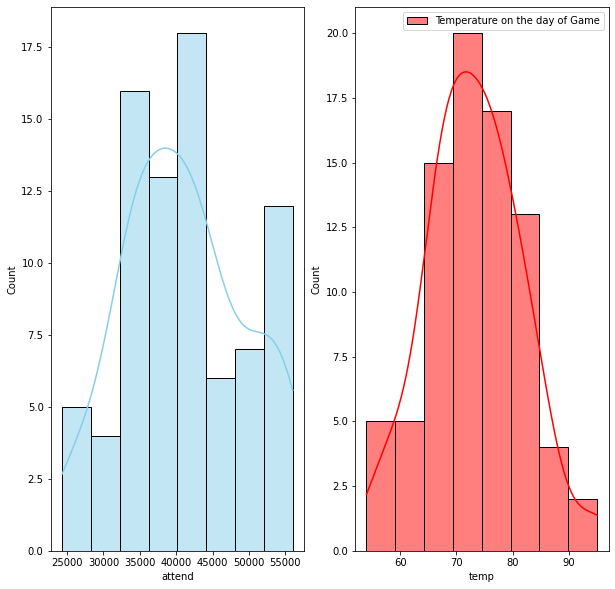

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.histplot(data=df, x="attend", color="skyblue", label="Attendance for Game", kde=True,ax=ax1)
sns.histplot(data=df, x="temp", color="red", label="Temperature on the day of Game", kde=True,ax=ax2)
plt.legend() 
plt.show()

Now I will check if there are any outliers for these continous/nominal variables.

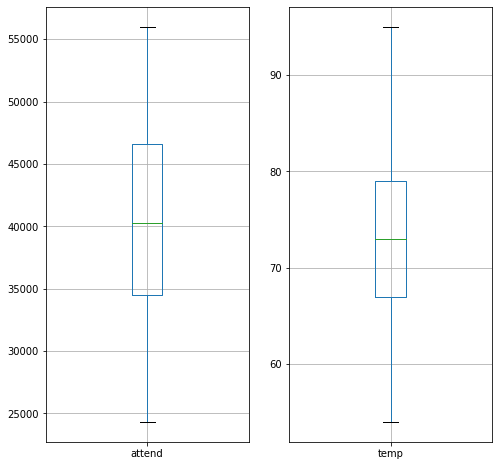

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
df.boxplot(column=['attend'],ax=ax1)
df.boxplot(column=['temp'],ax=ax2)
plt.show()

To my surprise there are no outliers for attendance on any game day. Also tempearture also looks quite consistent and there is no outlier.

Now let me check if temperature has any effect on attendance of Game. To check this, will plot on scatter plot with temperature on x-axis and attendance on y-axis.

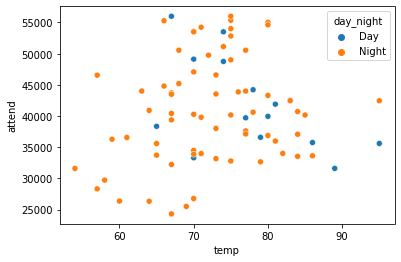

In [12]:
sns.scatterplot(data=df,x='temp',y='attend',hue='day_night')

Looking at scatter plot it looks like attendance for Game is maximum during when temperature is in the range of 65 to 85 degrees farenheit.

However it doesn't seem there is exact linear relationship between attendance and temperature.

Now lets check how is the attendance in every month. For this I will plot bar chart.

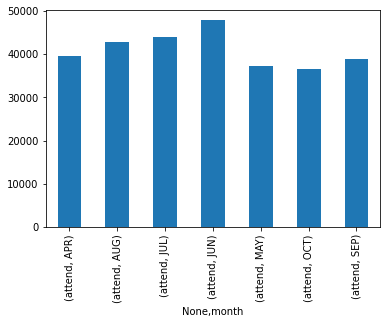

In [19]:
df[['attend','month']].groupby(["month"]).mean().unstack().plot.bar()

Based on data it looks like Game season starts in April and Ends in October. The Summer months June, July and August have highest attendance on average.

To my surprize, month of May have lesser average attendance. Generally its spring time and weather is not bad.

**Why would month of May had on an average less attendance?** 
Lets check the temperature, sky condition and any promotional items give in month of May.

In [22]:
may_df = df.query('month == "MAY"')
may_df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
12,MAY,7,43713,Monday,Giants,67,Clear,Night,NO,NO,NO,NO
13,MAY,8,32799,Tuesday,Giants,75,Clear,Night,NO,NO,NO,NO
14,MAY,9,33993,Wednesday,Giants,71,Clear,Night,NO,NO,NO,NO
15,MAY,11,35591,Friday,Rockies,65,Clear,Night,NO,NO,YES,NO
16,MAY,12,33735,Saturday,Rockies,65,Clear,Night,NO,NO,NO,NO
17,MAY,13,49124,Sunday,Rockies,70,Clear,Day,NO,NO,NO,NO
18,MAY,14,24312,Monday,Snakes,67,Clear,Night,NO,NO,NO,NO
19,MAY,15,47077,Tuesday,Snakes,70,Clear,Night,NO,NO,NO,YES
20,MAY,18,40906,Friday,Cardinals,64,Clear,Night,NO,NO,YES,NO
21,MAY,19,39383,Saturday,Cardinals,67,Clear,Night,NO,NO,NO,NO


Overall I notice, temperature was always better (in the rage of 65 to 85) and sky was also clear most (90%) of the time. The was fireworks 3 times and bobblehead was given as promotional item 2 times. No caps or shirts were given.

*I think **month of May** has great potential to increase the attendance. **So I would recommend month of May for carrying marketing promotions which can help with increasing attendance**.*

Now lets check **which Day of the week would be good** for promotion?

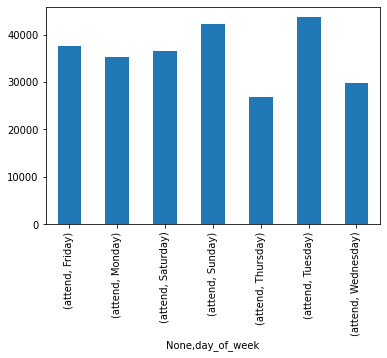

In [24]:
may_df[['attend','day_of_week']].groupby(["day_of_week"]).mean().unstack().plot.bar()

Careful look at May month data, I notice that
* Avg attendance was high on Tuesday. Bobblehead is given as promotional item on Tuesday
* Fireworks show was organized every Friday and attendance was just fine.
* Attendance was good on Saturday and Sundays considering its weekend. On Sunday's game is arranged in day time.
* **Attendance was kind of low on Wednesday's and lower on Thursday's. No promotional items are provided on Thursday and Wednesday.**

###  I see good opportunity to increase the attendance on Thursday's in month of MAY.Any Marketing promotions should be carried out on Thursday's in MAY.